<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/K-Nearest-Neighbor/machine_learning_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 전체 데이터 리스트(생선의 길이와 무게)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#**넘파이로 데이터 준비하기**
- 기존에는 파이썬 리스트를 순회하면서 원소를 하나씩 꺼내 생선 하나의 길이와 무게를 리트스 안의 리스트로 직접 구성

In [ ]:
import numpy as np

In [ ]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

**column_stack() 함수:**</br>
<u>전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결</u>

🔼(예시 배열은 3행 2열)

# 튜플(Tuple)
1. column_stack 함수로 전달하는 리스트는 파이썬 튜플로 전달
2. 리스트와 매우 비슷
3. 리스트처럼 원소에 순서가 있지만 한 번 만들어진 튜플은 ***수정 불가***
4. 함수로 전달한 값이 바뀌지 않는다는 것을 믿을 수 있음.</br>
  -> 매개변수 값으로 많이 사용

# 넘파이 배열 생성
- fish_ length와 fish_wieght 합치기
- 49행 2열
(행과 열을 맞추어 가지런히 정렬된 모습)

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])
fish_data.shape

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


(49, 2)

# 타깃 데이터 생성
- 기존에는 리스트 [1], [0]을 여러 번 곱해서 타깃 데이터 생성
- 넘파이에서는 np.ones(), np.zeros() 사용

In [ ]:
print(np.ones(5))
print(np.zeros(5))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


**np.concatenate() 함수:**  
 <u>첫 번째 차원을 따라 배열 연결</u>

In [ ]:
# 사이킷런으로 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split

# **train_test_split() 함수**
- 전달되는 리스트나 배열을 비율에 맞게 훈련/테스트 세트로 나눔
- 나누기 전에 알아서 섞어줌
- random_state 매개변수
  - 자체적으로 랜덤 시드 지정
- train_size 매개변수
  - train/test 비율 지정 가능
  - default는 75:25

In [ ]:
# 비율 설정하지 않으면 default는 75:25
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


# **샘플링 편향**
- 잘 섞였는지 확인하기 위해 출력
- 원래 35:14이기 때문에 2.5:1
- 이 테스트 세트의 도미와 빙어 비율은 3.3:1
- 샘플이 골고루 섞이지 않아 클래스 비율이 일정하지 않다면
  - → 모델이 일부 샘플을 *올바르게 학습할 수 없음*

In [ ]:
# 샘플링 편향 발생
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# **stratify 매개변수**
- stratify 매개변수에 타깃 데이터 전달
- 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용
- 실행 결과 2.25:1


In [ ]:
# stratify 매개변수에 타깃 데이터 전달: 클래스 비율에 맞게 데이터 나눔
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<hr></hr>

# **수상한 도미 한 마리**
- 새로운 학습 데이터로 k-최근접 이웃 훈련
- 모델 평가 수치 1.0으로 완벽한 결과

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
if kn.predict([[25, 150]]) == 0:  # 길이가 25cm이고, 무게가 150g이면 '도미'
  print('빙어')
else:
  print('도미')

빙어


- 길이가 25cm이고 무게가 150g이면 ***도미***라고 예측
- 하지만 현재 모델 샐행 결과는 ***빙어로 예측***
- 산점도를 봐도 도미가 훨씬 가깝게 보임

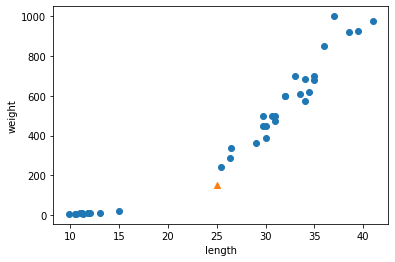

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')  # 길이 25cm, 무게 150g
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# **K-최근접 이웃 알고리즘**
- 오른쪽 위로 뻗어 있는 다른 도미 데이터에 더 가까움
- k-최근접 이웃은 <u>**주변의 샘플 중에서 다수인 클래스를 예측으로 사용**</u>
- n_neighbors  매개변수
  - KNeighborsClassifier 클래스의 *이웃개수*
  - default 값은 5
- kneighbors() 메서드: 주어진 샘플에서 가장 가까운 이웃을 찾아줌



In [ ]:
# 가장 가까운 5개의 거리와 인덱스 저장
distances, indexes = kn.kneighbors([[25, 150]])

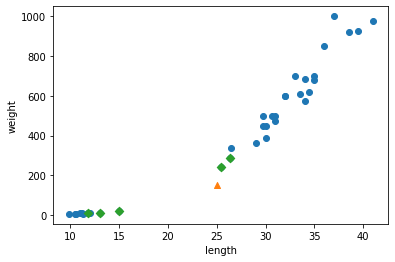

In [ ]:
# 인덱스를 이용해서 산점도 그리기

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')  # 길이 25cm, 무게 150g
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker='D')  # marker='D': 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 가장 가까운 데이터 5개의 거리 확인
# 가장 가까운 생선 4개는 모두 빙어

print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


# **기준을 맞춰라**

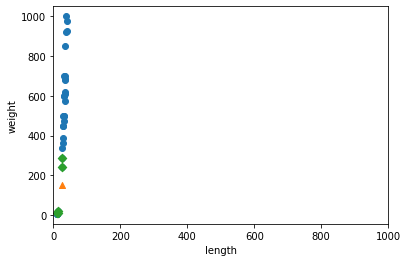

In [ ]:
# x축의 범위를 y축 범위와 동일하게 변경
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')  # 길이 25cm, 무게 150g
plt.scatter(train_input[indexes,0],
            train_input[indexes, 1], marker='D')  # marker='D': 마름모
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


- x축은 범위가 좁음: 10 ~ 40 / y축은 범위가 넓음: 0 ~ 1000
- x축은 범위를 y축과 동일하게 한다면? (xlim 함수 사용)
- 모든 데이터가 수직으로 늘어선 형태 → 생선의 길이(x축)은 영향 x
- 생선의 무게(y축)만 고려 대상

In [ ]:
# 평균, 표준편차를 이용해 표준점수 계산
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean.std)

<built-in method std of numpy.ndarray object at 0x7fa672ce9f30>
